In [19]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt



In [2]:
tickers=['XLK','XLF','XLV','XLE'] #Technology → XLK, Finance → XLF, Healthcare → XLV, Energy → XLE
for t in tickers:
    data=yf.download(tickers,start='2020-1-1',end='2024-1-1',auto_adjust=False)['Adj Close']

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  4 of 4 completed


In [3]:
data.tail()

Ticker,XLE,XLF,XLK,XLV
Date,,,,
2023-12-22,40.136036,36.384628,94.924271,131.168259
2023-12-26,40.480808,36.530788,95.319695,131.459671
2023-12-27,40.301334,36.647720,95.314743,132.013428
2023-12-28,39.687344,36.754906,95.428429,132.353455
2023-12-29,39.597607,36.637974,95.136810,132.489441


In [4]:
returns=data.pct_change().dropna()
returns

Ticker,XLE,XLF,XLK,XLV
Date,,,,
2020-01-03,-0.002971,-0.010618,-0.011243,-0.008714
2020-01-06,0.007781,-0.000650,0.002382,0.006223
2020-01-07,-0.002629,-0.006508,-0.000432,-0.001963
2020-01-08,-0.016472,0.006551,0.010700,0.006492
2020-01-09,0.007369,0.006183,0.011336,0.004300
...,...,...,...,...
2023-12-22,0.002951,0.002147,0.001303,0.004987
2023-12-26,0.008590,0.004017,0.004166,0.002222
2023-12-27,-0.004434,0.003201,-0.000052,0.004212


In [5]:
portfolio_weights={
    'XLK':0.40,
    'XLF':0.20,
    'XLV':0.25,
    'XLE':0.15
}

benchmark_weights={
    'XLK':0.35,
    'XLF':0.30,
    'XLV':0.20,
    'XLE':0.15
}

pw=pd.Series(portfolio_weights)
bw=pd.Series(benchmark_weights)

    
    




    

   


In [6]:
total_returns = (1 + returns).prod() - 1
total_returns


Ticker
XLE    0.670145
XLF    0.314028
XLK    1.141924
XLV    0.423389
dtype: float64

In [7]:
# Brinson Attribution Calculations

In [11]:
df=pd.DataFrame({
    'Sector':tickers,
    'portfolio_weights':pw,
    'benchmark_weights':bw,
    'portfolio_returns':total_returns,
    'benchmark_returns':total_returns
})

# Brinson-Fachler Model
df["Allocation"] = (df["portfolio_weights"] - df["benchmark_weights"]) * df["benchmark_returns"]
df["Selection"] = df["benchmark_weights"] * (df["portfolio_returns"] - df["benchmark_returns"])
df["Interaction"] = (df["portfolio_weights"] - df["benchmark_weights"]) * (df["portfolio_returns"] - df["benchmark_returns"])

df["Total_Attribution"] = df["Allocation"] + df["Selection"] + df["Interaction"]
df
    
    
    

,Sector,portfolio_weights,benchmark_weights,portfolio_returns,benchmark_returns,Allocation,Selection,Interaction,Total_Attribution
XLE,XLK,0.15,0.15,0.670145,0.670145,0.000000,0.0,0.0,0.000000
XLF,XLF,0.20,0.30,0.314028,0.314028,-0.031403,0.0,-0.0,-0.031403
XLK,XLV,0.40,0.35,1.141924,1.141924,0.057096,0.0,0.0,0.057096
XLV,XLE,0.25,0.20,0.423389,0.423389,0.021169,0.0,0.0,0.021169


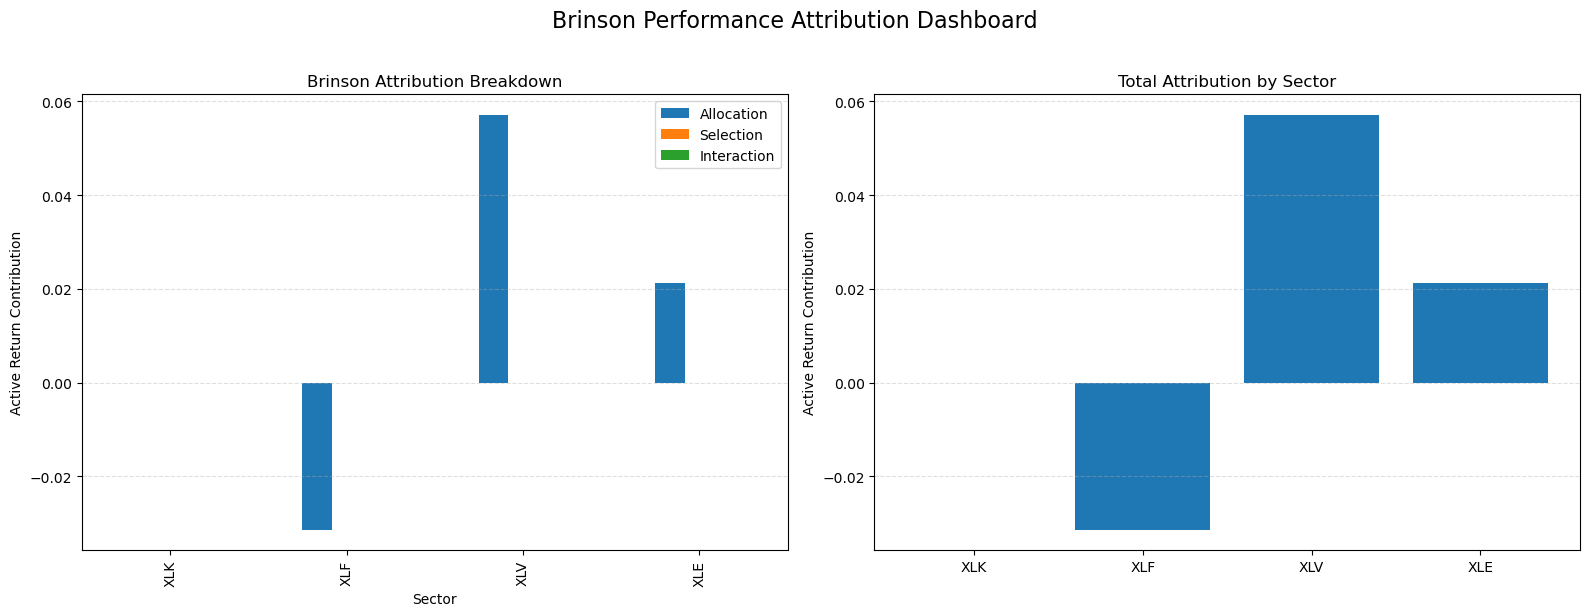

In [15]:


fig, axes = plt.subplots(1, 2, figsize=(16, 6))


 # Allocation / Selection / Interaction

df.plot(
    x="Sector",
    y=["Allocation", "Selection", "Interaction"],
    kind="bar",
    ax=axes[0]
)
axes[0].set_title("Brinson Attribution Breakdown")
axes[0].set_ylabel("Active Return Contribution")
axes[0].grid(axis="y", linestyle="--", alpha=0.4)


 # Total Attribution

axes[1].bar(df["Sector"], df["Total_Attribution"])
axes[1].set_title("Total Attribution by Sector")
axes[1].set_ylabel("Active Return Contribution")
axes[1].grid(axis="y", linestyle="--", alpha=0.4)

plt.suptitle("Brinson Performance Attribution Dashboard", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
